In [269]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import missingno as mn
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split

# Predicting Medical insurance
[Dataset](https://www.kaggle.com/mirichoi0218/insurance)

Features used:
1. Age
2. Sex(converted to binary)
3. Body Mass Index
4. No of children
5. Does the person smoke?

Model : `Multivariate linear regression`

In [270]:
data = pd.read_csv('/kaggle/input/insurance/insurance.csv')
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## Checking if we need to clean data

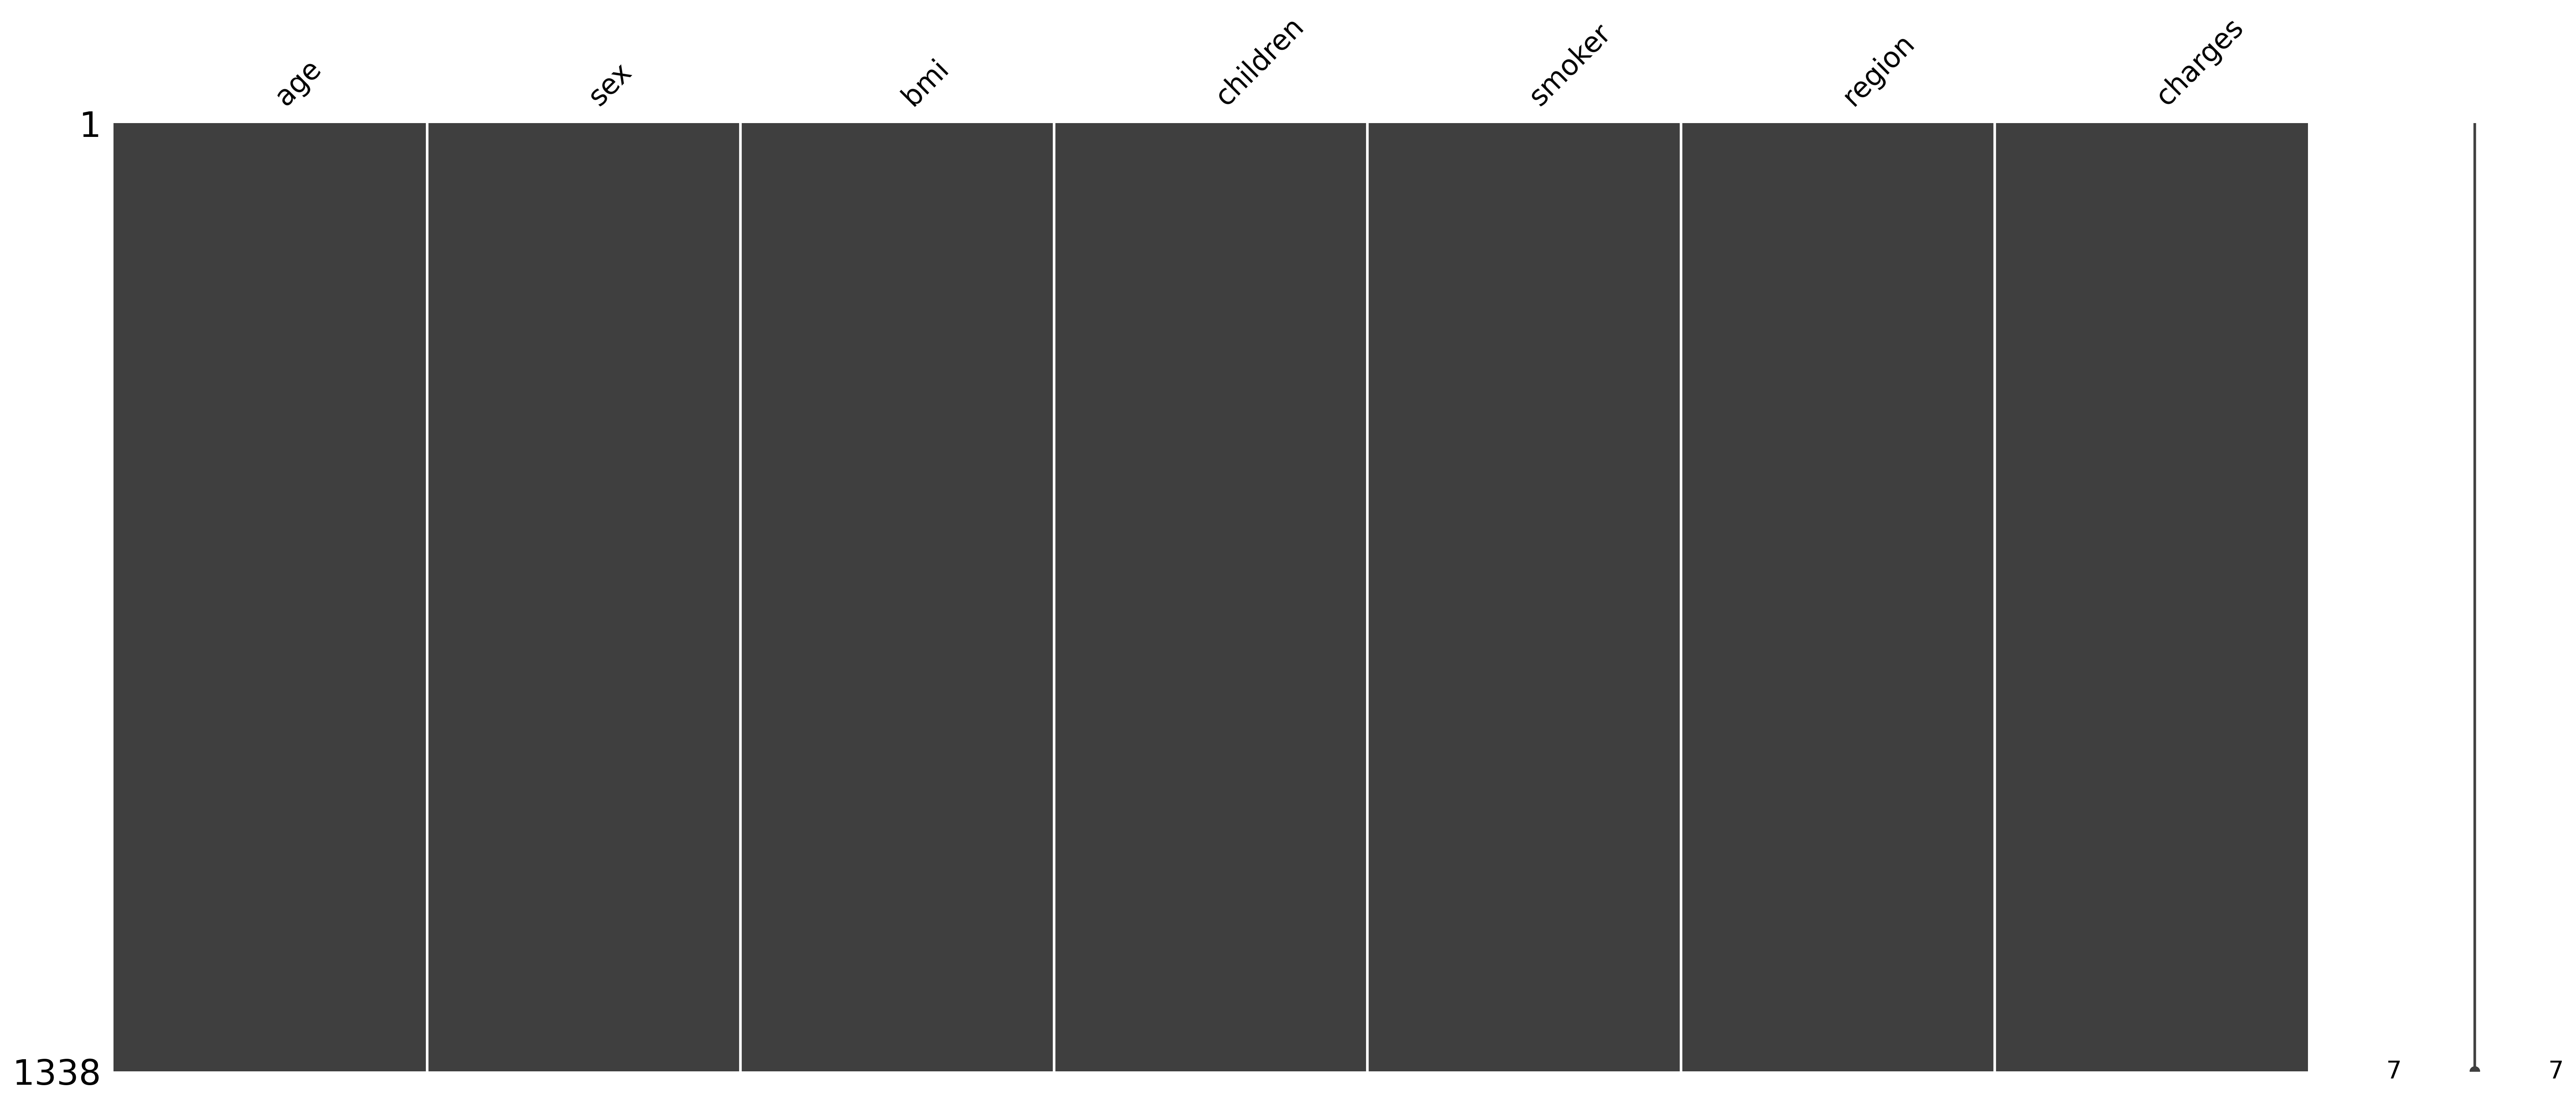

In [271]:
mn.matrix(data)
plt.show()

## Converting sex data and smoker data to binary

In [272]:
data['smoker'] = np.where(data['smoker'] == "yes",1,0)
data['sex'] = np.where(data['sex'] == "female", 1, 0)
data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


## Plotting each feature wrt label

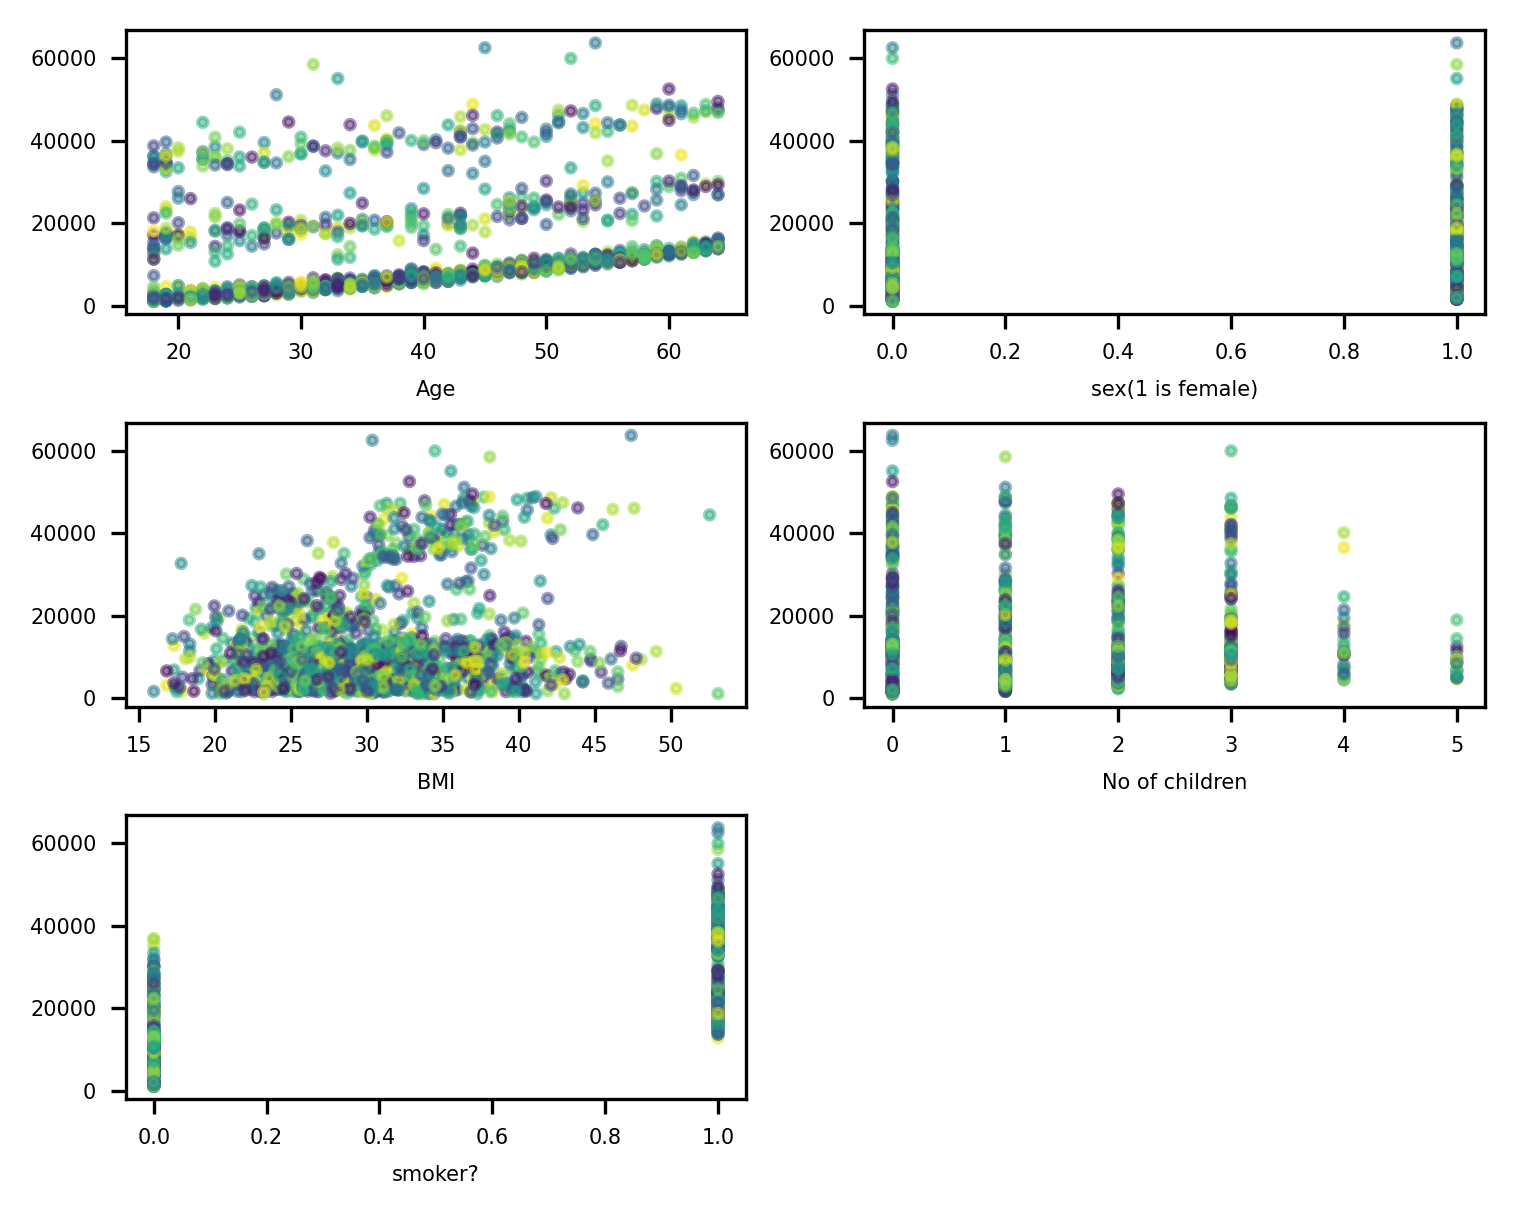

In [273]:
mpl.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.size': 5})
np.random.seed(19680801)
colors = np.random.rand(len(data))
plt.figure(figsize=(5, 4))
plt.subplot(3, 2, 1)
plt.scatter(data['age'],data['charges'],s=5,c=colors,alpha=0.5)
plt.xlabel('Age')
plt.subplot(3, 2, 2)
plt.scatter(data['sex'],data['charges'],s=5,c=colors,alpha=0.5)
plt.xlabel('sex(1 is female)')
plt.subplot(3, 2, 3)
plt.scatter(data['bmi'],data['charges'],s=5,c=colors,alpha=0.5)
plt.xlabel('BMI')
plt.subplot(3, 2, 4)
plt.scatter(data['children'],data['charges'],s=5,c=colors,alpha=0.5)
plt.xlabel('No of children')
plt.subplot(3, 2, 5)
plt.scatter(data['smoker'],data['charges'],s=5,c=colors,alpha=0.5)
plt.xlabel('smoker?')
plt.tight_layout()
plt.show()

In [274]:
X = np.array(data.iloc[:, :5])
y = np.array(data['charges'])
Xn = np.ones((X.shape[0],X.shape[1]+1))
Xn[:,1:] = X
X = Xn
theta = np.zeros((X.shape[1],1))
alpha = 0.01

## feature normalization so that gradient decent is faster

In [275]:
mu = np.mean(X,axis= 0)
sigma = np.std(X, axis = 0)
X[:,1] = (X[:,1]-mu[1])/sigma[1]
X[:,3] = (X[:,3]-mu[3])/sigma[3]

## Dividing in test and train datasets

In [276]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
m = X_train.shape[0]
y_train = y_train.reshape((y_train.shape[0],1))
y_test = y_test.reshape((y_test.shape[0],1))

## Manual Gradient Decent

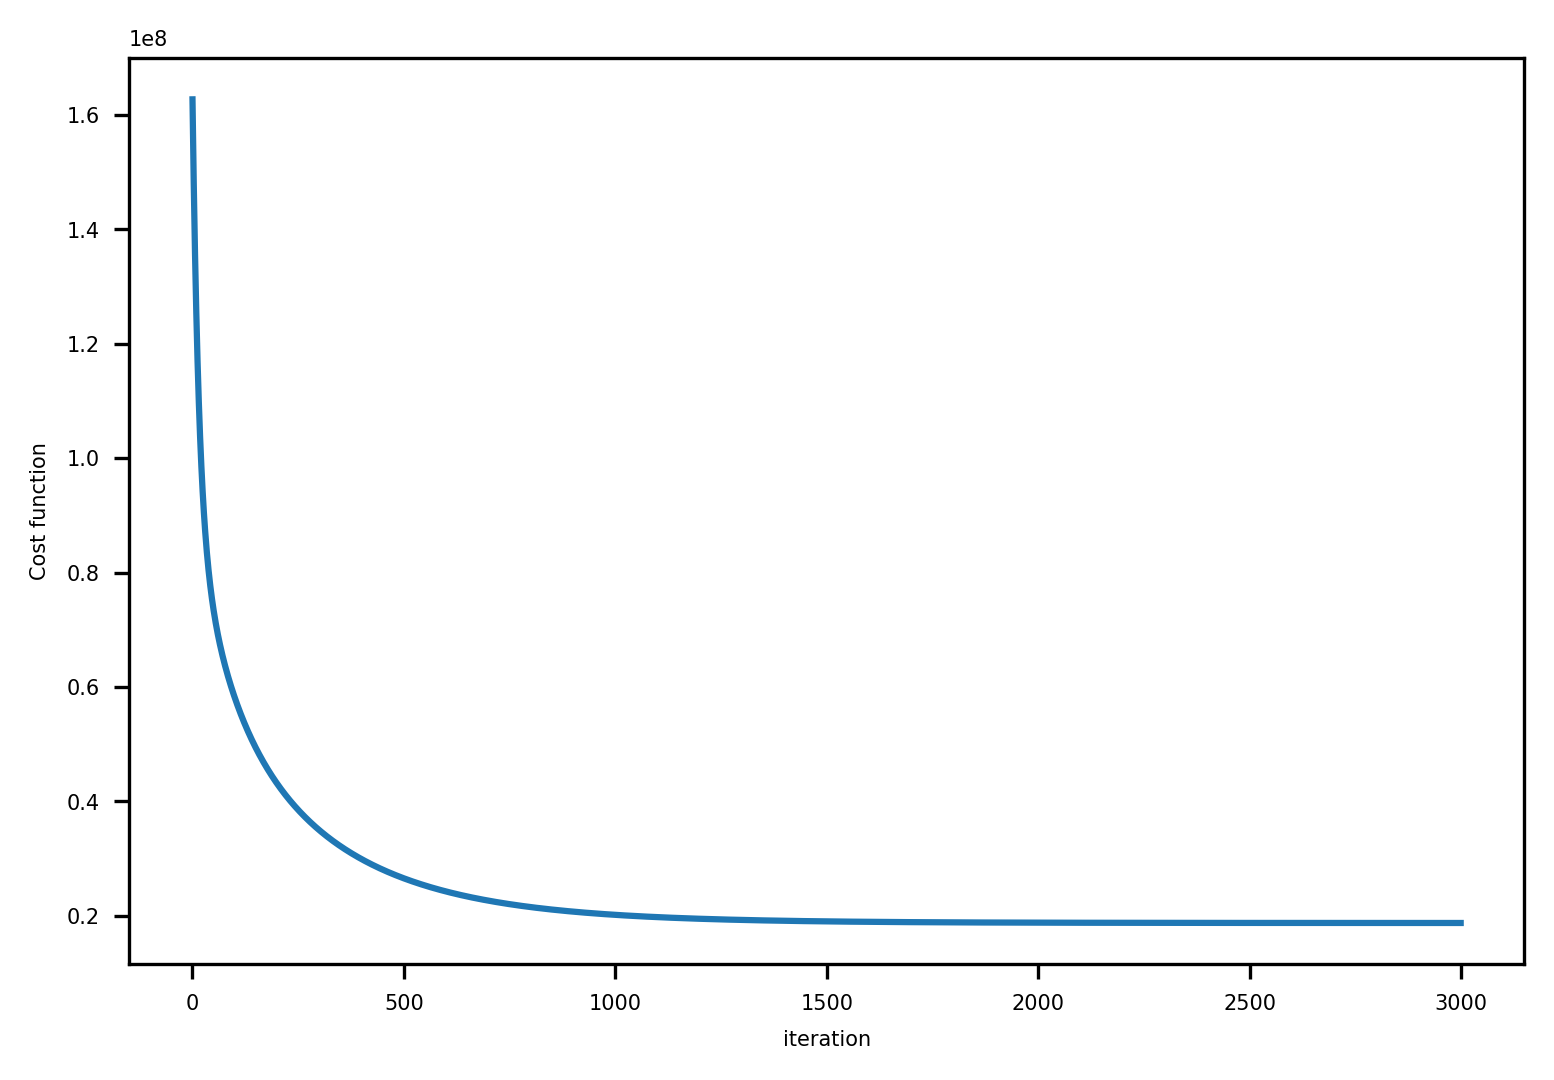

In [277]:
J_values = np.zeros(3000)
for i in range(3000):
    J_values[i] = (np.sum((X_train.dot(theta)-y_train)**2))/(2*m)
    theta = theta - (alpha/m)*((X_train.T).dot((X_train.dot(theta)-y_train)))
plt.plot(range(3000),J_values)
plt.xlabel('iteration')
plt.ylabel('Cost function')
plt.show()

In [278]:
y_predicted = X_test.dot(theta)
rmse = np.sqrt((np.sum((y_predicted-y_test)**2))/y_predicted.shape[0])
print(theta)
rmse

[[ 8173.25803149]
 [ 3681.20486378]
 [ -190.50041947]
 [ 2020.95016183]
 [  371.32094207]
 [23515.36530098]]


5949.9518083643015

In [279]:
for i in range(20):
    print(f"{y_predicted[i]} {y_test[i]}")

[8424.22915202] [9095.06825]
[6928.87386482] [5272.1758]
[36743.8787356] [29330.98315]
[9437.12634098] [9301.89355]
[26808.8335985] [33750.2918]
[11236.53414728] [4536.259]
[-15.03150605] [2117.33885]
[17072.42727384] [14210.53595]
[611.70212391] [3732.6251]
[11199.7880858] [10264.4421]
[28312.89086588] [18259.216]
[9361.51666697] [7256.7231]
[5322.8955734] [3947.4131]
[38457.47620048] [46151.1245]
[40538.91794549] [48673.5588]
[37217.75872553] [44202.6536]
[15276.01152846] [9800.8882]
[35890.11295386] [42969.8527]
[9268.15081891] [8233.0975]
[31239.64921223] [21774.32215]


## Regression using sklearn's inbuilt method

In [280]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [281]:
regr = LinearRegression()
regr.fit(X_train,y_train)
y_predicted = regr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_predicted)))
print(regr.coef_)

5946.010056762587
[[    0.          3684.64415528  -146.5321422   2021.65211657
    377.66377381 23693.21588352]]


In [282]:
for i in range(20):
    print(f"{y_predicted[i]} {y_test[i]}")

[8405.9256603] [9095.06825]
[6896.23868525] [5272.1758]
[36895.58982383] [29330.98315]
[9381.50792191] [9301.89355]
[26906.1365246] [33750.2918]
[11167.26691409] [4536.259]
[-52.69388791] [2117.33885]
[17003.5884751] [14210.53595]
[575.64200873] [3732.6251]
[11145.24343373] [10264.4421]
[28431.0500438] [18259.216]
[9298.88891839] [7256.7231]
[5294.83953877] [3947.4131]
[38581.62045961] [46151.1245]
[40647.29738538] [48673.5588]
[37335.41236692] [44202.6536]
[15260.70329561] [9800.8882]
[36045.12604011] [42969.8527]
[9244.08043852] [8233.0975]
[31386.21778584] [21774.32215]
